<a href="https://colab.research.google.com/github/fotrino/DMA_LAB2/blob/master/tutoriales/07_fronteras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/fotrino/DMA_LAB2/blob/master/tutoriales/07_fronteras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fronteras de Decisión

Evaluación las fronteras de decisión de distintos Algoritmos de Clasificación y Regresión

In [1]:
#PRUEBA
import itertools
import numpy as np
from sklearn.datasets import make_circles, load_iris
from mlxtend.plotting import plot_decision_regions
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


In [2]:
# Definimos parámetros estéticos
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['axes.edgecolor'] = "white"
sns.set()
# plt.rcParams.keys()

In [3]:
# Ocultamos warnings al graficar
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

## Objetivos

Vamos a definir distintos targets a predecir.

Para el problema de Clasificación vamos a utilizar:
*   El Dataset Iris
*   Una clasificación sintética de un Target Circular
*   La clasificación en un problema de XOR (“exclusive or”)

Para el problema de Regresión vamos a utilizar:
* Una Regresión Lineal 
* Una Regresión Exponencial   



In [4]:
rng = np.random.RandomState(0)
iris = load_iris()
X_circle, y_cicle = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)
X_regres = 100 * rng.rand(100, 1) + 10
X_xor = rng.randn(300, 2)

In [6]:
data = {
    "regresión": {
        "X": X_regres,
        "y": 200 + 1500 * X_regres[:, 0] + rng.rand(X_regres.shape[0]) * 50000
    },
    "regresión2": {
        "X": X_regres,
        "y": 200 + X_regres[:, 0] ** 4 + rng.rand(X_regres.shape[0]) * 50000000
    },
    "iris": {
        "X": iris.data[:, [0, 2]],
        "y": iris.target
    },
    "xor": {
        "X": X_xor,
        "y": np.array(np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0), dtype=int)
    },
    "circulo": {
        "X": X_circle,
        "y": y_cicle
    }   

}

### Target: El Dataset Iris

En este problema de clasificación tenemos una clase que es linealmente separable, y otras dos que lo son parcialmente.

Vamos a usar solo dos variables explicativas para simplifacar la representación gráfica

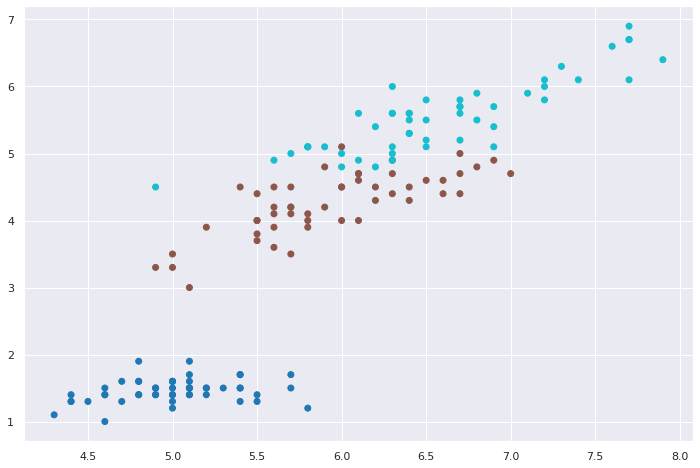

In [7]:
plt.scatter(data["iris"]["X"][:,0], data["iris"]["X"][:,1], c=data["iris"]["y"], cmap='tab10')

### Target: Clasificación de un Target Circular

Usamos la función `make_circles` de `sklearn` para construirlo

Se define una clase en la circunferencia del circulo y otra clase en el interior del círculo

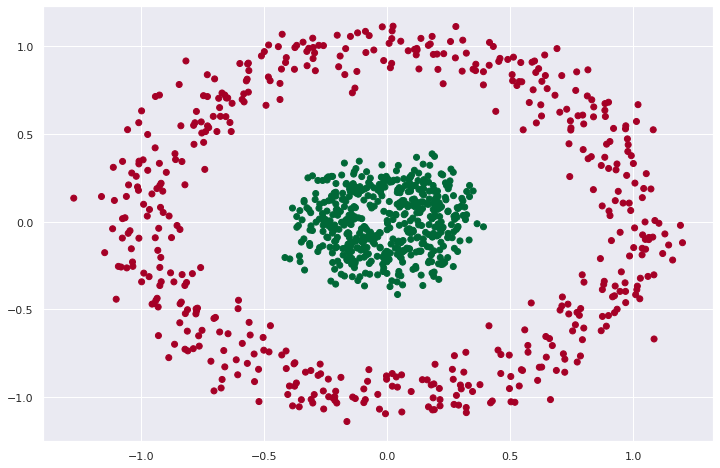

In [8]:
plt.scatter(data["circulo"]["X"][:,0], data["circulo"]["X"][:,1], c=data["circulo"]["y"], cmap='RdYlGn')

### Target: Clasificación en un problema de XOR (“exclusive or”)

Es el problema de predecir las salidas de las puertas lógicas XOr dadas dos entradas binarias. 

Una función XOr debe devolver un valor verdadero si las dos entradas no son iguales y un valor falso si son iguales. 

Como definimos un aleatorio con media cero, vamos a utilizar ese corte en ambas variables para definir las clases


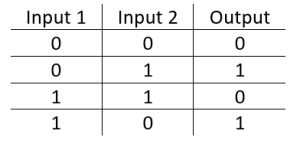


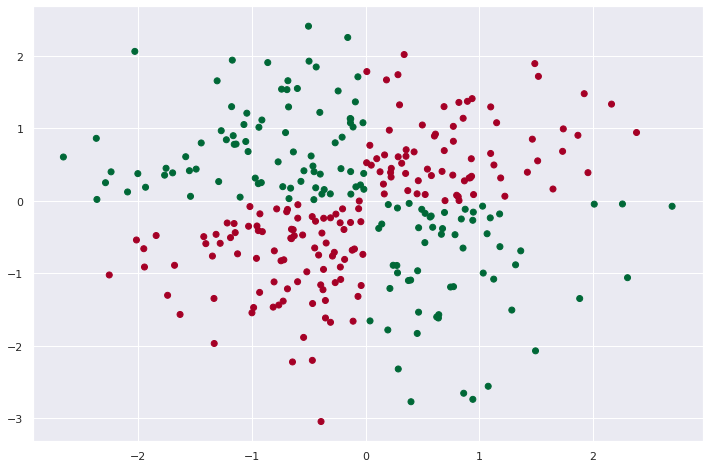

In [9]:
plt.scatter(data["xor"]["X"][:,0], data["xor"]["X"][:,1], c=data["xor"]["y"], cmap='RdYlGn')

### Target: Rgresión Lineal

Buscamos explicar un comportamiento lineal donde Y crece a una escala mayor que X

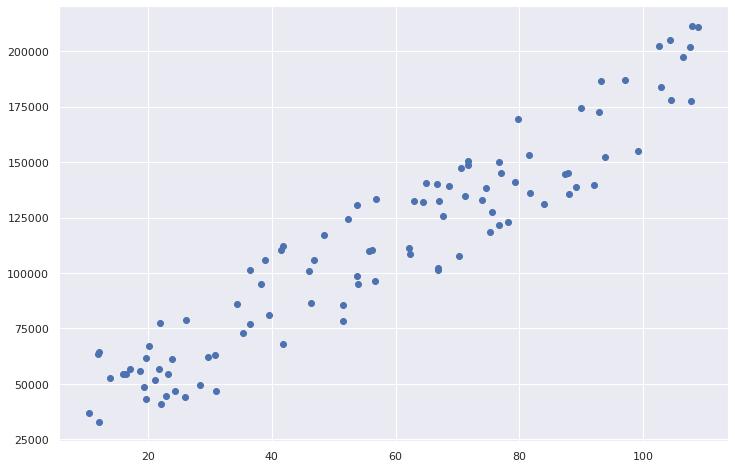

In [10]:
plt.scatter(data["regresión"]["X"], data["regresión"]["y"])

### Target: Rgresión Exponencial

Buscamos explicar un comportamiento donde Y crece de forma exponencial respecto a X

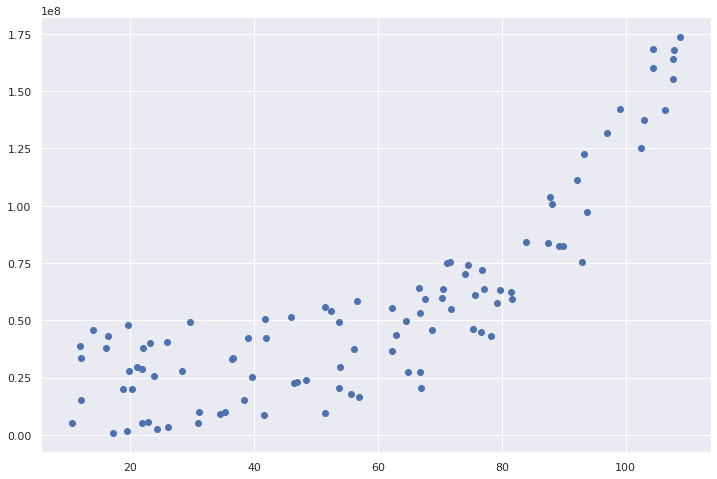

In [11]:
plt.scatter(data["regresión2"]["X"], data["regresión2"]["y"])

# Algoritmos de Aprendizaje Supervisado

## Regresión Lineal

### Tarea: sólo regresión

### Modelo: $$\hat{y} = \sum_{i=0}^p{\theta_i . x_i}$$

### Costo: $$\sum_{i=0}^n{(\hat{y_i} - y_i)^2} $$


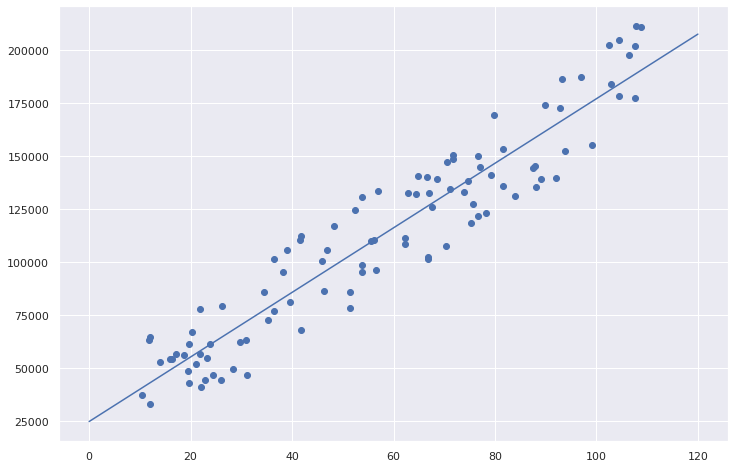

In [12]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(data["regresión"]["X"], data["regresión"]["y"])
plt.scatter(data["regresión"]["X"], data["regresión"]["y"])
plt.plot(np.linspace(0, 120), model.predict(np.linspace(0, 120)[:, None]))

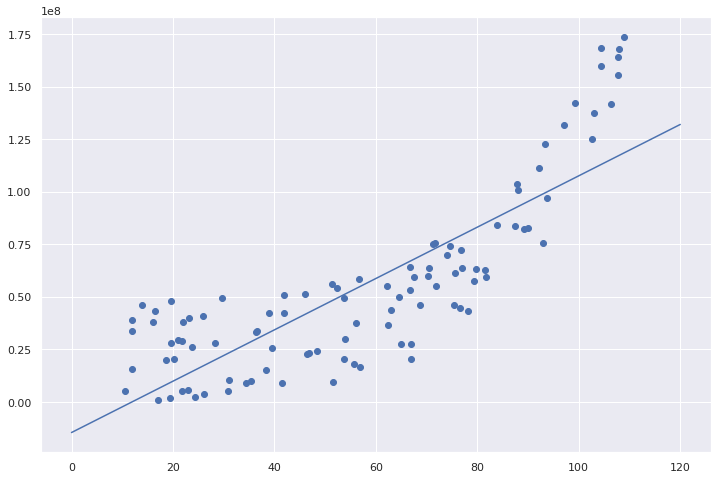

In [13]:
model = LinearRegression()
model.fit(data["regresión2"]["X"], data["regresión2"]["y"])
plt.scatter(data["regresión2"]["X"], data["regresión2"]["y"])
plt.plot(np.linspace(0, 120), model.predict(np.linspace(0, 120)[:, None]))

# Regresión Logistica

### Tarea: sólo clasificación

### Modelo: $$\hat{y} = \frac{1}{1 + e^{-\sum_{i=0}^p{\theta_i . x_i}}}$$

### Costo: $$\sum_{i=0}^n{y_i . \log{(\hat{y_i} + \epsilon)} + (1 - y_i) . \log{(\hat{1 - y_i + \epsilon) }}} $$

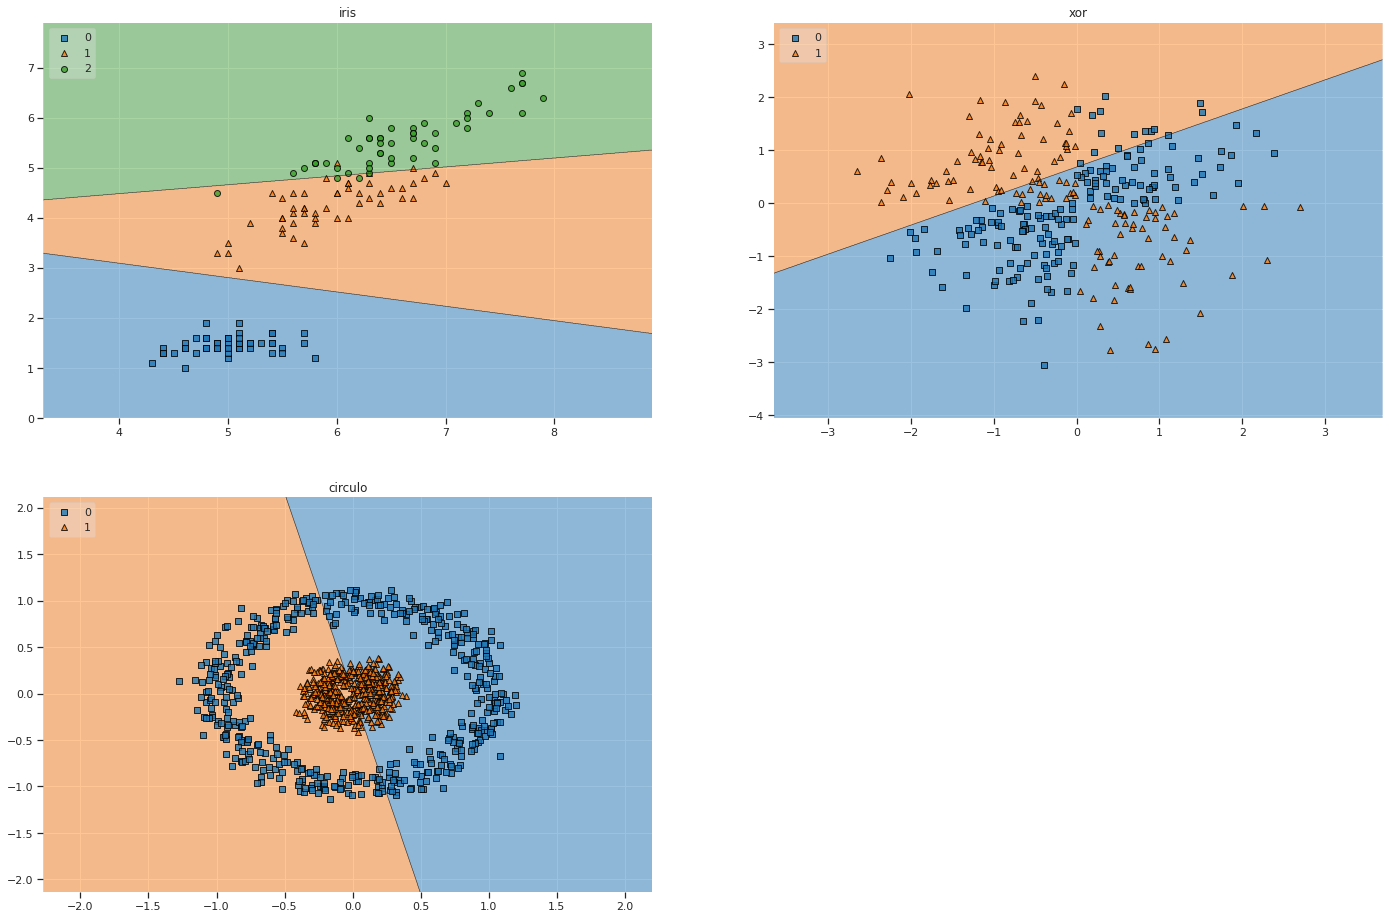

In [14]:
gs = gridspec.GridSpec(2, 2) # Imprimo resultados en una cuadrícula
plt.rcParams['figure.figsize'] = (24, 16)

from sklearn.linear_model import LogisticRegression

for tipo, grd  in zip(["iris", "xor", "circulo"], itertools.product([0, 1], repeat=2)):
    clf = LogisticRegression()
    clf.fit(data[tipo]["X"], data[tipo]["y"])
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=data[tipo]["X"], y=data[tipo]["y"], clf=clf, legend=2)
    plt.title(tipo)

# KNN

### Tareas: regresión y clasificación

### Modelo: no hay, basado en memoria

### Parámetros: cantidad de vecinos / radio del vecindario


In [ ]:
clfClass()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

gs = gridspec.GridSpec(2, 3)

for (tipo, clfClass), grd  in zip([("regresión", KNeighborsRegressor),
                                   ("regresión2", KNeighborsRegressor),
                                   ("iris", KNeighborsClassifier),
                                   ("xor", KNeighborsClassifier),
                                   ("circulo", KNeighborsClassifier)], itertools.product([0, 1, 2], repeat=2)):
    clf = clfClass()
    clf.fit(data[tipo]["X"], data[tipo]["y"])
    ax = plt.subplot(gs[grd[0], grd[1]])
    try:
        fig = plot_decision_regions(X=data[tipo]["X"], y=data[tipo]["y"], clf=clf, legend=2)
    except:
        plt.scatter(data[tipo]["X"], data[tipo]["y"])
        plt.plot(np.linspace(0, 120), clf.predict(np.linspace(0, 120)[:, None]))
    plt.title(tipo)

In [ ]:
gs = gridspec.GridSpec(2, 3)

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

for (tipo, clfClass), grd  in zip([("regresión", KNeighborsRegressor),
                                   ("regresión2", KNeighborsRegressor)], itertools.product([0, 1, 2], repeat=2)):
    clf = clfClass(n_neighbors = 20)
    clf.fit(data[tipo]["X"], data[tipo]["y"])
    ax = plt.subplot(gs[grd[0], grd[1]])
    try:
        fig = plot_decision_regions(X=data[tipo]["X"], y=data[tipo]["y"], clf=clf, legend=2)
    except:
        plt.scatter(data[tipo]["X"], data[tipo]["y"])
        plt.plot(np.linspace(0, 120), clf.predict(np.linspace(0, 120)[:, None]))
    plt.title(tipo)

# Naive Bayes

### Tarea: sólo clasficación

### Modelo: 
Busca encontrar la probabilidad de la variable explicada condicionada a las variables explicativas, para ello parte del teorema de bayes

### $$P(y \mid x_1, \dots, x_n) = \frac{P(y) P(x_1, \dots x_n \mid y)} {P(x_1, \dots, x_n)}$$
                                 
La parte "Naive" viene de asumir muy "inocentemente" que todas las variables explicativas son independientes entre si, ergo:

### $$P(x_i | y, x_1, \dots, x_{i-1}, x_{i+1}, \dots, x_n) = P(x_i | y)$$

### $$P(x_1, \dots x_n \mid y) = \prod_{i=1}^{n} P(x_i \mid y)$$

### $$P(y \mid x_1, \dots, x_n) = \frac{P(y) \prod_{i=1}^{n} P(x_i \mid y)} {P(x_1, \dots, x_n)}$$

In [ ]:
gs = gridspec.GridSpec(2, 2)

from sklearn.naive_bayes import GaussianNB

for tipo, grd  in zip(["iris", "xor", "circulo"], itertools.product([0, 1], repeat=2)):
    clf = GaussianNB()
    clf.fit(data[tipo]["X"], data[tipo]["y"])
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=data[tipo]["X"], y=data[tipo]["y"], clf=clf, legend=2)
    plt.title(tipo)

## Support Vector Machines

### Tareas: regresión y clasificación

Busca maximizar los margenes entre clases, cuando no es posible una separación lineal, se puede usar el "kernel trick"

In [ ]:
from sklearn.svm import LinearSVC, LinearSVR

gs = gridspec.GridSpec(2, 3)

for (tipo, clfClass), grd  in zip([("regresión", LinearSVR),
                                   ("regresión2", LinearSVR),
                                   ("iris", LinearSVC),
                                   ("xor", LinearSVC),
                                   ("circulo", LinearSVC)], itertools.product([0, 1, 2], repeat=2)):
    clf = clfClass()
    clf.fit(data[tipo]["X"], data[tipo]["y"])
    ax = plt.subplot(gs[grd[0], grd[1]])
    try:
        fig = plot_decision_regions(X=data[tipo]["X"], y=data[tipo]["y"], clf=clf, legend=2)
    except:
        plt.scatter(data[tipo]["X"], data[tipo]["y"])
        plt.plot(np.linspace(0, 120), clf.predict(np.linspace(0, 120)[:, None]))
    plt.title(tipo)

### Truco del Kernel para separar en un nuevo plano los datos

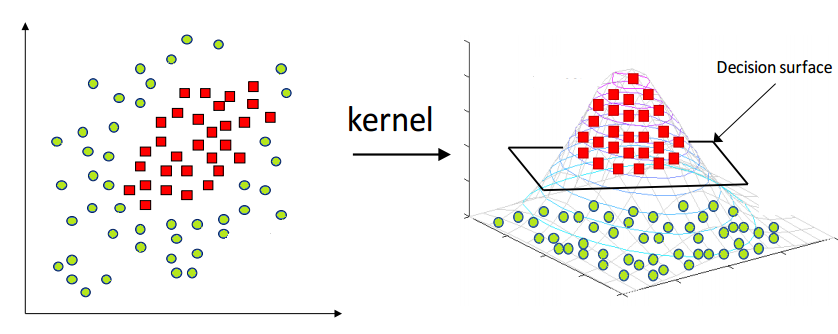

In [ ]:
from sklearn.svm import SVC, SVR

gs = gridspec.GridSpec(2, 3)

for (tipo, clfClass, params), grd  in zip([("regresión", SVR, {"kernel": "linear"}),
                                   ("regresión2", SVR, {"kernel": "poly"}),
                                   ("iris", SVC, {"kernel": "rbf"}),
                                   ("xor", SVC, {}),
                                   ("circulo", SVC, {})], itertools.product([0, 1, 2], repeat=2)):
    clf = clfClass(**params)
    clf.fit(data[tipo]["X"], data[tipo]["y"])
    ax = plt.subplot(gs[grd[0], grd[1]])
    try:
        fig = plot_decision_regions(X=data[tipo]["X"], y=data[tipo]["y"], clf=clf, legend=2)
    except:
        plt.scatter(data[tipo]["X"], data[tipo]["y"])
        plt.plot(np.linspace(0, 120), clf.predict(np.linspace(0, 120)[:, None]))
    plt.title(tipo)

# Árboles de decision

### Tareas: regresión y clasificación

Son metodos de inducción no paramétricos (no hay modelo tipo ecuación). Se basan en la creación "greedy" de simples reglas de decisión que permitan modelar el problema.


In [ ]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

gs = gridspec.GridSpec(2, 3)

for (tipo, clfClass), grd  in zip([("regresión", DecisionTreeRegressor),
                                   ("regresión2", DecisionTreeRegressor),
                                   ("iris", DecisionTreeClassifier),
                                   ("xor", DecisionTreeClassifier),
                                   ("circulo", DecisionTreeClassifier)], itertools.product([0, 1, 2], repeat=2)):
    clf = clfClass()
    clf.fit(data[tipo]["X"], data[tipo]["y"])
    ax = plt.subplot(gs[grd[0], grd[1]])
    try:
        fig = plot_decision_regions(X=data[tipo]["X"], y=data[tipo]["y"], clf=clf, legend=2)
    except:
        plt.scatter(data[tipo]["X"], data[tipo]["y"])
        plt.plot(np.linspace(0, 120), clf.predict(np.linspace(0, 120)[:, None]))
    plt.title(tipo)

# Ensamble 1: Random Forest

### Tareas: regresión y clasificación

Consiste en promediar una serie de algortimos base (arboles, sino se llama bagging), entreganos en un sub-set de casos y variables. Busca disminuir la varianza de la estimación


In [ ]:
from sklearn.ensemble  import RandomForestClassifier, RandomForestRegressor

gs = gridspec.GridSpec(2, 3)

for (tipo, clfClass), grd  in zip([("regresión", RandomForestRegressor),
                                   ("regresión2", RandomForestRegressor),
                                   ("iris", RandomForestClassifier),
                                   ("xor", RandomForestClassifier),
                                   ("circulo", RandomForestClassifier)], itertools.product([0, 1, 2], repeat=2)):
    clf = clfClass()
    clf.fit(data[tipo]["X"], data[tipo]["y"])
    ax = plt.subplot(gs[grd[0], grd[1]])
    try:
        fig = plot_decision_regions(X=data[tipo]["X"], y=data[tipo]["y"], clf=clf, legend=2)
    except:
        plt.scatter(data[tipo]["X"], data[tipo]["y"])
        plt.plot(np.linspace(0, 120), clf.predict(np.linspace(0, 120)[:, None]))
    plt.title(tipo)

# Ensamble 1: Boosting (Adaboosting & GraientBoosting)

### Tareas: regresión y clasificación

Son metodos que también agregan clasificadores base, pero en lugar de promediarlos, van ajustando los pesos de los posteriores, basados en los erroes de los anteriores


In [ ]:
from lightgbm import LGBMClassifier, LGBMRegressor

gs = gridspec.GridSpec(2, 3)

for (tipo, clfClass), grd  in zip([("regresión", LGBMRegressor),
                                   ("regresión2", LGBMRegressor),
                                   ("iris", LGBMClassifier),
                                   ("xor", LGBMClassifier),
                                   ("circulo", LGBMClassifier)], itertools.product([0, 1, 2], repeat=2)):
    clf = clfClass()
    clf.fit(data[tipo]["X"], data[tipo]["y"])
    ax = plt.subplot(gs[grd[0], grd[1]])
    try:
        fig = plot_decision_regions(X=data[tipo]["X"], y=data[tipo]["y"], clf=clf, legend=2)
    except:
        plt.scatter(data[tipo]["X"], data[tipo]["y"])
        plt.plot(np.linspace(0, 120), clf.predict(np.linspace(0, 120)[:, None]))
    plt.title(tipo)